In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import urllib.parse
from io import StringIO
import datetime as dt
import calendar
import time
import os
from data_utils import establish_nys_session
import warnings
warnings.filterwarnings('ignore')

def check_weekday_or_weekend(date):
    try:
        # Convert the input date string to a datetime object
        given_date = dt.datetime.strptime(date, '%Y-%m-%d')
         
        # Use isoweekday() to get the weekday (Monday is 1 and Sunday is 7)
        day_of_week = (given_date.weekday() + 1) % 7  # Convert Sunday from 6 to 0
         
        # Determine if it's a weekday or a weekend
        if day_of_week < 5:
            day_type = 'weekday'
        else:
            day_type = 'weekend'
         
        # Print the result
        #print(f"The day of the week for {given_date.strftime('%Y-%m-%d')} is {day_of_week} ({day_type})")
        #print(f"{day_type}")
        return day_type
        
    except ValueError as e:
        print(f"Error: {e}")


Read the CSVs into a pandas df

In [2]:
folder_path = 'Ressources/'
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dataframes = []  # List to hold all dataframes

for file in files:
    file_path = os.path.join(folder_path, file)  # Full path to file
    df = pd.read_csv(file_path)  # Read the file into a DataFrame
    dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames in the list into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.head()

,date,station_complex,borough,payment_method,total_ridership,lat,lng
0,2022-02-01,103 St (1),Manhattan,metrocard,5021,40.799446,-73.968376
1,2022-02-01,103 St (6),Manhattan,metrocard,5711,40.790600,-73.947479
2,2022-02-01,"103 St (C,B)",Manhattan,metrocard,1624,40.796093,-73.961456
3,2022-02-01,103 St-Corona Plaza (7),Queens,metrocard,9449,40.749866,-73.862701
4,2022-02-01,104 St (A),Queens,metrocard,835,40.681709,-73.837685


What is the amount of omny vs metrocard users during the week? CD

What is the amounf of omny vs metrocard users during the weekend? CD

In [3]:
combined_df["weekday or weekend"] = ""
combined_df.head()

,date,station_complex,borough,payment_method,total_ridership,lat,lng,weekday or weekend
0,2022-02-01,103 St (1),Manhattan,metrocard,5021,40.799446,-73.968376,
1,2022-02-01,103 St (6),Manhattan,metrocard,5711,40.790600,-73.947479,
2,2022-02-01,"103 St (C,B)",Manhattan,metrocard,1624,40.796093,-73.961456,
3,2022-02-01,103 St-Corona Plaza (7),Queens,metrocard,9449,40.749866,-73.862701,
4,2022-02-01,104 St (A),Queens,metrocard,835,40.681709,-73.837685,


In [4]:
wk_wnd_mta_df = combined_df
wk_wnd_mta_df['weekday or weekend'] = wk_wnd_mta_df['date'].apply(check_weekday_or_weekend)
wk_wnd_mta_df.head()

,date,station_complex,borough,payment_method,total_ridership,lat,lng,weekday or weekend
0,2022-02-01,103 St (1),Manhattan,metrocard,5021,40.799446,-73.968376,weekday
1,2022-02-01,103 St (6),Manhattan,metrocard,5711,40.790600,-73.947479,weekday
2,2022-02-01,"103 St (C,B)",Manhattan,metrocard,1624,40.796093,-73.961456,weekday
3,2022-02-01,103 St-Corona Plaza (7),Queens,metrocard,9449,40.749866,-73.862701,weekday
4,2022-02-01,104 St (A),Queens,metrocard,835,40.681709,-73.837685,weekday


In [5]:
wk_wnd_mta_df['year'] = ""
wk_wnd_mta_df['date'] = pd.to_datetime(wk_wnd_mta_df['date'])
wk_wnd_mta_df['year'] = wk_wnd_mta_df['date'].dt.strftime('%Y')
wk_wnd_mta_df.head()

,date,station_complex,borough,payment_method,total_ridership,lat,lng,weekday or weekend,year
0,2022-02-01,103 St (1),Manhattan,metrocard,5021,40.799446,-73.968376,weekday,2022
1,2022-02-01,103 St (6),Manhattan,metrocard,5711,40.790600,-73.947479,weekday,2022
2,2022-02-01,"103 St (C,B)",Manhattan,metrocard,1624,40.796093,-73.961456,weekday,2022
3,2022-02-01,103 St-Corona Plaza (7),Queens,metrocard,9449,40.749866,-73.862701,weekday,2022
4,2022-02-01,104 St (A),Queens,metrocard,835,40.681709,-73.837685,weekday,2022


In [6]:
wkd_mta_2022 = wk_wnd_mta_df.loc[(wk_wnd_mta_df['year'] == '2022') & (wk_wnd_mta_df['weekday or weekend'] == 'weekday')]
wkd_mta_2022 = pd.DataFrame(wkd_mta_2022.groupby(['payment_method'])['total_ridership'].mean())
wkd_mta_2023 = wk_wnd_mta_df.loc[(wk_wnd_mta_df['year'] == '2023') & (wk_wnd_mta_df['weekday or weekend'] == 'weekday')]
wkd_mta_2023 = pd.DataFrame(wkd_mta_2023.groupby(['payment_method'])['total_ridership'].mean())
wkd_mta_2024 = wk_wnd_mta_df.loc[(wk_wnd_mta_df['year'] == '2024') & (wk_wnd_mta_df['weekday or weekend'] == 'weekday')]
wkd_mta_2024 = pd.DataFrame(wkd_mta_2024.groupby(['payment_method'])['total_ridership'].mean())

wkd_mta_2022 = wkd_mta_2022.rename(columns = {'total_ridership':'2022'})
wkd_mta_2023 = wkd_mta_2023.rename(columns = {'total_ridership':'2023'})
wkd_mta_2024 = wkd_mta_2024.rename(columns = {'total_ridership':'2024'})

wkd_mta_df = pd.merge(wkd_mta_2022, wkd_mta_2023, how='left', on='payment_method')
wkd_mta_df = pd.merge(wkd_mta_df, wkd_mta_2024, how='left', on='payment_method')
wkd_mta_df

,2022,2023,2024
payment_method,,,
metrocard,4516.395338,4264.438254,3824.622110
omny,2411.576950,3474.947860,3884.803261


What is the amount of omny vs metrocard users during the weekdays?

In [7]:
wnd_mta_2022 = wk_wnd_mta_df.loc[(wk_wnd_mta_df['year'] == '2022') & (wk_wnd_mta_df['weekday or weekend'] == 'weekend')]
wnd_mta_2022 = pd.DataFrame(wnd_mta_2022.groupby(['payment_method'])['total_ridership'].mean())
wnd_mta_2023 = wk_wnd_mta_df.loc[(wk_wnd_mta_df['year'] == '2023') & (wk_wnd_mta_df['weekday or weekend'] == 'weekend')]
wnd_mta_2023 = pd.DataFrame(wnd_mta_2023.groupby(['payment_method'])['total_ridership'].mean())
wnd_mta_2024 = wk_wnd_mta_df.loc[(wk_wnd_mta_df['year'] == '2024') & (wk_wnd_mta_df['weekday or weekend'] == 'weekend')]
wnd_mta_2024 = pd.DataFrame(wnd_mta_2024.groupby(['payment_method'])['total_ridership'].mean())

wnd_mta_2022 = wnd_mta_2022.rename(columns = {'total_ridership':'2022'})
wnd_mta_2023 = wnd_mta_2023.rename(columns = {'total_ridership':'2023'})
wnd_mta_2024 = wnd_mta_2024.rename(columns = {'total_ridership':'2024'})

wnd_mta_df = pd.merge(wnd_mta_2022, wnd_mta_2023, how='left', on='payment_method')
wnd_mta_df = pd.merge(wnd_mta_df, wnd_mta_2024, how='left', on='payment_method')
wnd_mta_df

,2022,2023,2024
payment_method,,,
metrocard,3956.294583,3645.107655,3245.450703
omny,2337.199959,3250.066403,3586.767870


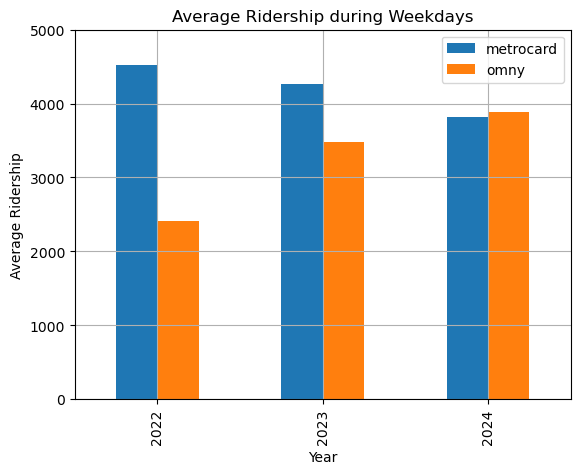

In [8]:
fig1 = wkd_mta_df.transpose().plot(kind='bar')
fig1.set_ylim([0, 5000])
fig1.set_xlabel('Year')
fig1.set_ylabel('Average Ridership')
fig1.set_title('Average Ridership during Weekdays')
fig1.legend(loc='best')
fig1.grid()

In [9]:
#Weekday Ridership Annual Percent Change
wkd_mta_change_df = wkd_mta_df
wkd_mta_change_df['2022-2023 % Change'] = round((- wkd_mta_change_df['2022'] + wkd_mta_change_df['2023'])/wkd_mta_change_df['2022']*100)
wkd_mta_change_df['2023-2024 % Change'] = round((- wkd_mta_change_df['2023'] + wkd_mta_change_df['2024'])/wkd_mta_change_df['2023']*100)
wkd_mta_change_df = wkd_mta_change_df.drop(columns = ['2022','2023','2024'])
wkd_mta_change_df

,2022-2023 % Change,2023-2024 % Change
payment_method,,
metrocard,-6.0,-10.0
omny,44.0,12.0


What is the amount of omny vs metrocard users during the weekends?

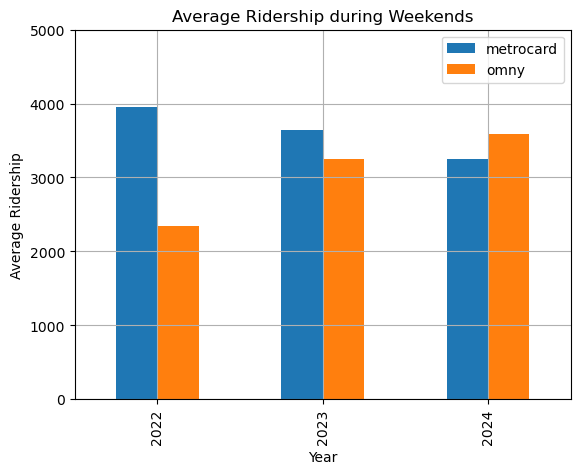

In [10]:
fig2 = wnd_mta_df.transpose().plot(kind='bar')
fig2.set_ylim([0, 5000])
fig2.set_xlabel('Year')
fig2.set_ylabel('Average Ridership')
fig2.set_title('Average Ridership during Weekends')
fig2.legend(loc='best')
fig2.grid()

In [11]:
#Weekend Ridership Annual Percent Change
wnd_mta_change_df = wnd_mta_df
wnd_mta_change_df['2022-2023 % Change'] = round((- wnd_mta_change_df['2022'] + wnd_mta_change_df['2023'])/wnd_mta_change_df['2022']*100)
wnd_mta_change_df['2023-2024 % Change'] = round((- wnd_mta_change_df['2023'] + wnd_mta_change_df['2024'])/wnd_mta_change_df['2023']*100)
wnd_mta_change_df = wnd_mta_change_df.drop(columns = ['2022','2023','2024'])
wnd_mta_change_df

,2022-2023 % Change,2023-2024 % Change
payment_method,,
metrocard,-8.0,-11.0
omny,39.0,10.0


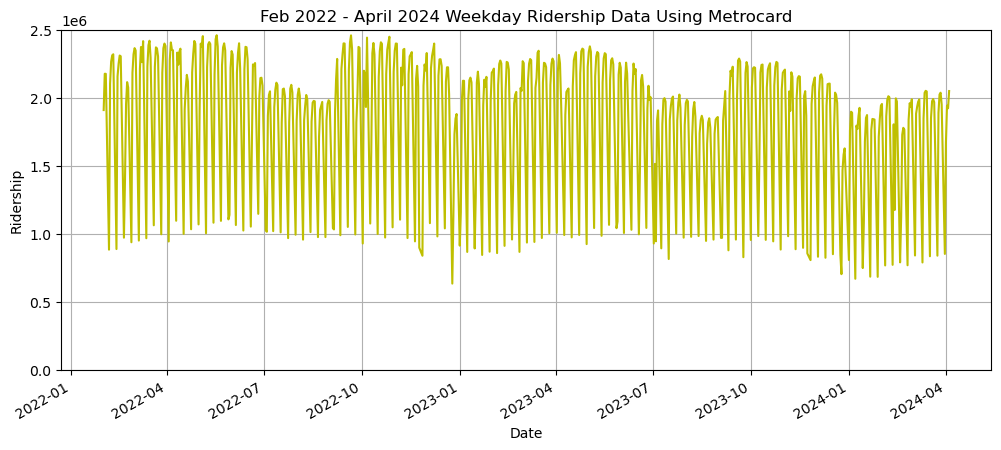

In [19]:
hist_wkd_mta = wk_wnd_mta_df.loc[(wk_wnd_mta_df['weekday or weekend'] == 'weekday') & (wk_wnd_mta_df['payment_method'] == 'metrocard')]
hist_wkd_mta = hist_wkd_mta.groupby(['date'])['total_ridership'].sum()
plt.figure(figsize=(12,5))
hist_wkd_mta.plot(color = 'y')
plt.title('Feb 2022 - April 2024 Weekday Ridership Data Using Metrocard')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.ylim(0,2500000)
plt.grid()
plt.show()


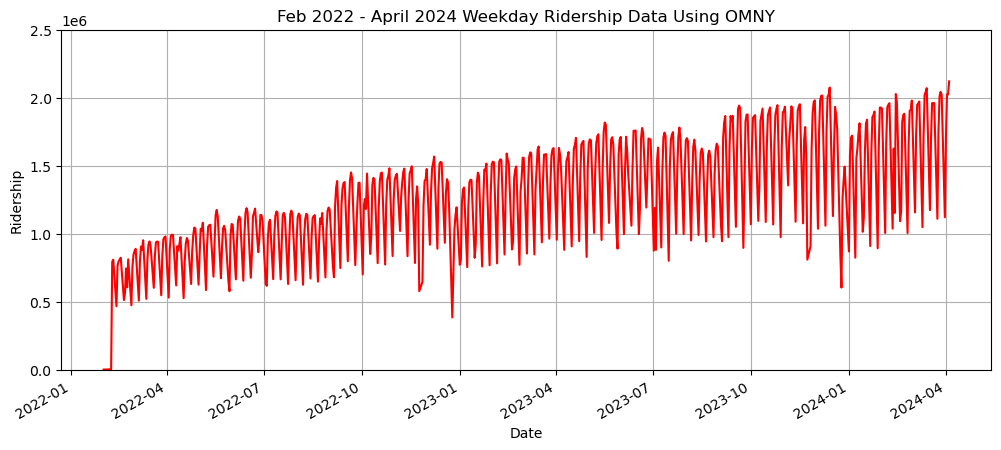

In [18]:
hist_wnd_mta = wk_wnd_mta_df.loc[(wk_wnd_mta_df['weekday or weekend'] == 'weekday') & (wk_wnd_mta_df['payment_method'] == 'omny')]
hist_wnd_mta = hist_wnd_mta.groupby(['date'])['total_ridership'].sum()
plt.figure(figsize=(12,5))
hist_wnd_mta.plot(color = 'r')
plt.title('Feb 2022 - April 2024 Weekday Ridership Data Using OMNY')
plt.xlabel('Date')
plt.ylabel('Ridership')
plt.ylim(0,2500000)
plt.grid()
plt.show()

In [17]:
hist_wnd_mta

date
2022-02-04          5
2022-02-05        969
2022-02-11     797642
2022-02-12     706678
2022-02-18     799039
               ...   
2024-03-22    1783159
2024-03-23    1072690
2024-03-29    1798472
2024-03-30    1491019
2024-04-05    1934821
Name: total_ridership, Length: 226, dtype: int64